# Hypothesis Testing with Insurance Data (Core)
Jon Messier \
3/9/2023

For this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


For each question, make sure to:

1.  State your Null Hypothesis and Alternative Hypothesis
2.   Select the correct test according to the data type and number of samples
3.   Test the assumptions of your selected test.
4.  Execute the selected test, or the alternative test (if you do not meet the assumptions)
5.   Interpret your p-value and reject or fail to reject your null hypothesis 
6.   Show a supporting visualization that helps display the result




In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

In [2]:
## load the health data set. display info and head
df = pd.read_csv("Data/insurance - insurance.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> No null data

## Q1 Do smokers have higher insurance charges than non-smokers?

### 1.  State your Null Hypothesis and Alternative Hypothesis
- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non smokers. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference in insurance charges between smokers and non smokers. 


### 2. Select the correct test according to the data type and number of samples

- Type of Data? 
 - Numeric - `Charges` 
- How many groups/samples? 2
    - 2 smoker/non-smoker
- Therefore, which test is appropriate? 
    - 2 Sample T-test



## Visualize and Separate Data for hypothesis

In [15]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [32]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [33]:
#Separate male and female data
y_df = df[df["smoker"]=="yes"]
n_df = df[df["smoker"]=="no"]

<AxesSubplot: xlabel='smoker', ylabel='charges'>

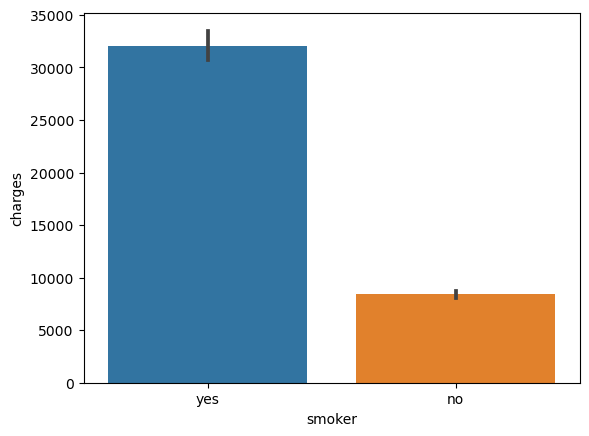

In [34]:
sns.barplot(data=df, x="smoker", y="charges")

### 3.  Test the assumptions of your selected test.
-  No significant outliers
-  Normality
-  Equal Variance
 

#### Check for significant outliers.  Remove if present

In [35]:
#Look at charges greater than 3 standard deviations from the mean for males
y_outliers = np.abs(stats.zscore(y_df["charges"])) > 3
y_outliers.sum()

0

In [36]:
#Look at charges greater than 3 standard deviations from the mean for females
n_outliers = np.abs(stats.zscore(n_df["charges"])) > 3
n_outliers.sum()

24

In [37]:
#remove outliers
n_df=n_df.loc[~n_outliers]

#### Test for Normality



In [38]:
result = stats.normaltest(y_df['charges'])
result.pvalue

5.564930630036463e-14

In [39]:
len(y_df["charges"])

274

In [40]:
result = stats.normaltest(n_df['charges'])
result.pvalue

2.6945416315543976e-36

In [41]:
len(n_df["charges"])

1040

>With large enough datasets and low p-values we can disregard the assumption of normality

#### Test for equal variance

In [42]:
## Use Levene's test for equal variance
result = stats.levene(y_df["charges"], n_df['charges'])
print(result)
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

### 4.  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [44]:
result = stats.ttest_ind(y_df["charges"], n_df['charges'], equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

We had a p-value < .05 for our Welch's t-test. We reject the null hypothesis and support the alternative that: \
*There is a significant difference in insurance charges between smokers and non smokers.*

### 5. Interpret your p-value and reject or fail to reject your null hypothesis

### 6. Show a supporting visualization that helps display the result

## Q2  Are men more likely to smoke than women?

- $H_0$ (Null Hypothesis): Men and Women are equally likely to smoke. 
- $H_A$ (Alternative Hypothesis):  There is a statistical difference in the number of men and women smokers. 

## Q3. Do different regions have different charges, on average?

- $H_0$ (Null Hypothesis): Different regions do not have statistically different charges on average. 
- $H_A$ (Alternative Hypothesis):  Different regions have a statistical difference in average charges. 